In [19]:
from src.datasets.load_aircraft_data import load_aircraft_dataset
from src.datasets.aircraft_dataset import AircraftDataset
import matplotlib.pyplot as plt
from src.utils.denormalize import denormalize
from src.transforms.transforms import (
    train_transform,
    resize_crop_transform,
    color_jitter_transform,
    rotation_transform,
    graysacle_transform,
    perspective_trandform,
    base_transform
)

In [25]:
DATAPATH="data/aircraft_data"
num_folders=5

In [26]:
dataset = AircraftDataset(DATAPATH, num_folders)

data/aircraft_data/data/data_0
data/aircraft_data/data/data_1
data/aircraft_data/data/data_2
data/aircraft_data/data/data_3
data/aircraft_data/data/data_4


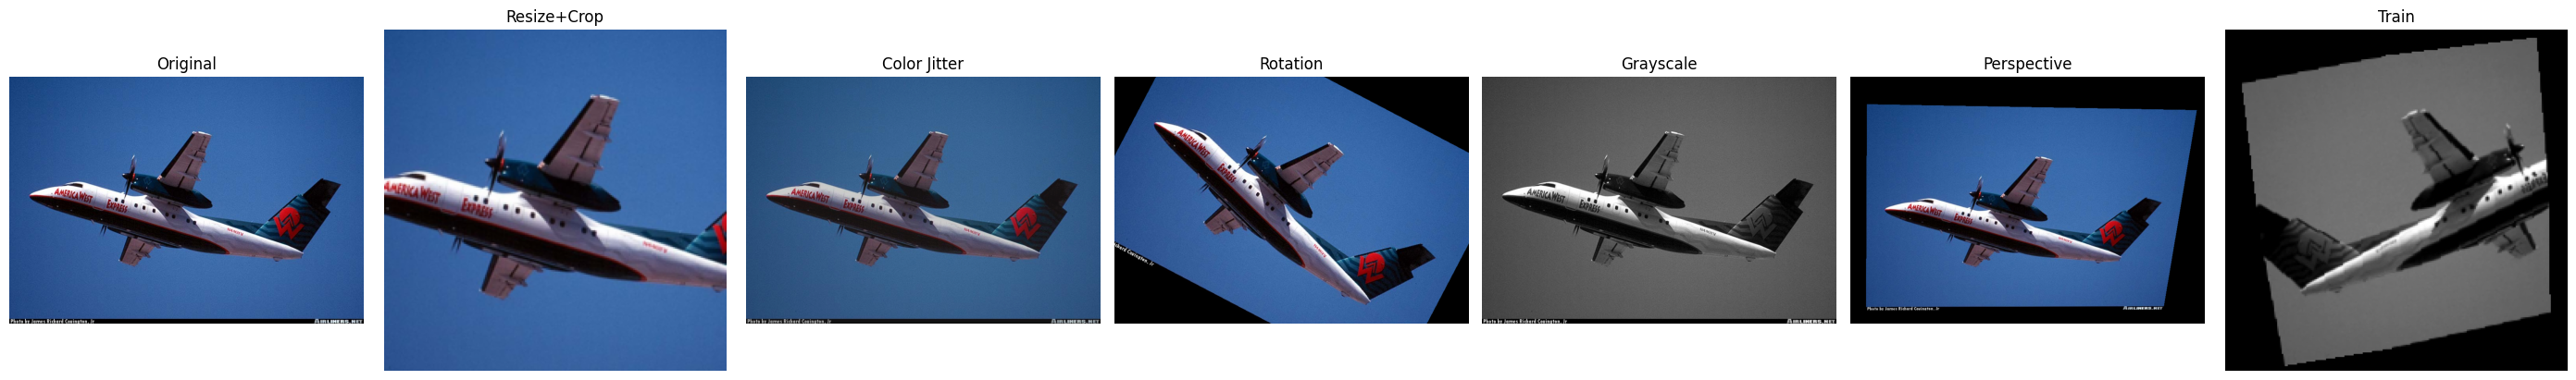

In [28]:

# Пример mean/std (замените на свои)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Все аугментации для демонстрации
augmentations = {
    "Original": base_transform,
    "Resize+Crop": resize_crop_transform,
    "Color Jitter": color_jitter_transform,
    "Rotation": rotation_transform,
    "Grayscale": graysacle_transform,
    "Perspective": perspective_trandform,
    "Train": train_transform
}

# Выбираем картинку
idx = 300
fig, axes = plt.subplots(1, len(augmentations), figsize=(4 * len(augmentations), 4))

for i, (name, aug) in enumerate(augmentations.items()):
    # Загружаем изображение с нужной трансформацией
    sample = dataset.__getitem__(idx, aug)
    tensor_image = sample['data_object']
    # Денормализация
    img_denorm = denormalize(tensor_image, mean, std)
    img_np = img_denorm.permute(1, 2, 0).clamp(0, 1)

    # Отображение
    axes[i].imshow(img_np)
    axes[i].set_title(name, fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()
